# Example of a working PINN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [3]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2209 (8.63 KB)
Trainable params: 2209 (8.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [5]:
def ode_system(t, net):  
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    one = tf.ones((1,1))

    with tf.GradientTape() as tape:
        tape.watch(t)

        u = net(t)
         
        u_t = tape.gradient(u, t)
        print('u vector: ', u)
        print('t vector: ', t)
        print('gradient: ', u_t)
    

    ode_loss = u_t - tf.math.cos(2*np.pi*t)
    IC_loss = net(t_0) - one

    square_loss = tf.square(ode_loss) + tf.square(IC_loss)
    total_loss = tf.reduce_mean(square_loss)

    return total_loss

0
u vector:  tf.Tensor(
[[ 0.        ]
 [-0.05566492]
 [-0.11036408]
 [-0.16322044]
 [-0.21351603]
 [-0.26073194]
 [-0.3045557 ]
 [-0.34486294]
 [-0.38168222]
 [-0.415155  ]
 [-0.44549668]
 [-0.47296453]
 [-0.4978325 ]
 [-0.5203734 ]
 [-0.54084814]], shape=(15, 1), dtype=float32)
t vector:  tf.Tensor(
[[0.        ]
 [0.14285715]
 [0.2857143 ]
 [0.42857143]
 [0.5714286 ]
 [0.71428573]
 [0.85714287]
 [1.        ]
 [1.1428572 ]
 [1.2857143 ]
 [1.4285715 ]
 [1.5714285 ]
 [1.7142857 ]
 [1.8571428 ]
 [2.        ]], shape=(15, 1), dtype=float32)
gradient:  tf.Tensor(
[[-0.39080292]
 [-0.38736862]
 [-0.37738803]
 [-0.36175895]
 [-0.34177348]
 [-0.3188869 ]
 [-0.29450515]
 [-0.26983392]
 [-0.24580543]
 [-0.22306827]
 [-0.20201898]
 [-0.18285292]
 [-0.1656176 ]
 [-0.15026054]
 [-0.13666664]], shape=(15, 1), dtype=float32)


I0000 00:00:1706209661.647416   51803 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1.6467941
1
u vector:  tf.Tensor(
[[ 0.01796662]
 [-0.02453055]
 [-0.06633455]
 [-0.10674944]
 [-0.14520249]
 [-0.18127722]
 [-0.2147212 ]
 [-0.24543214]
 [-0.27343082]
 [-0.29882944]
 [-0.3218007 ]
 [-0.34255105]
 [-0.3613014 ]
 [-0.37827152]
 [-0.39367145]], shape=(15, 1), dtype=float32)
t vector:  tf.Tensor(
[[0.        ]
 [0.14285715]
 [0.2857143 ]
 [0.42857143]
 [0.5714286 ]
 [0.71428573]
 [0.85714287]
 [1.        ]
 [1.1428572 ]
 [1.2857143 ]
 [1.4285715 ]
 [1.5714285 ]
 [1.7142857 ]
 [1.8571428 ]
 [2.        ]], shape=(15, 1), dtype=float32)
gradient:  tf.Tensor(
[[-0.29814255]
 [-0.29592022]
 [-0.288517  ]
 [-0.27661932]
 [-0.26123637]
 [-0.24351752]
 [-0.22458246]
 [-0.20539841]
 [-0.18671793]
 [-0.16906777]
 [-0.15277234]
 [-0.13799244]
 [-0.12476846]
 [-0.11305862]
 [-0.10276899]], shape=(15, 1), dtype=float32)
2
u vector:  tf.Tensor(
[[ 0.03571732]
 [ 0.00616595]
 [-0.02294349]
 [-0.05108805]
 [-0.07783565]
 [-0.10287123]
 [-0.12600398]
 [-0.14715731]
 [-0.16634908]
 [-0.18

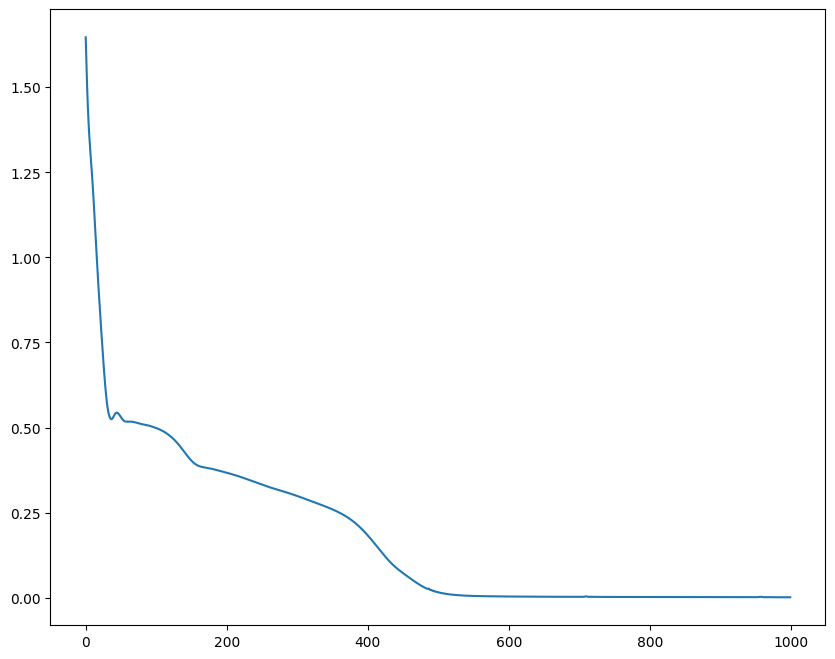

In [6]:
# train_t = (np.array([0., 0.25, 0.475, 0.5, 0.525, 0.75, 0.9, 0.95, 1., 1.05, 1.1, 1.25, 1.4, 1.45, 1.5, 1.55, 1.6, 1.75, 1.95, 2.])).reshape(-1, 1)
train_t = np.linspace(0,2,15)
train_loss_record = []

for itr in range(1000):
    print(itr)
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, NN.trainable_variables)
        optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 200 == 0:
        print(train_loss.numpy())

plt.figure(figsize = (10,8))
plt.plot(train_loss_record)
plt.show()

4/4 [==============================] - 0s 2ms/step


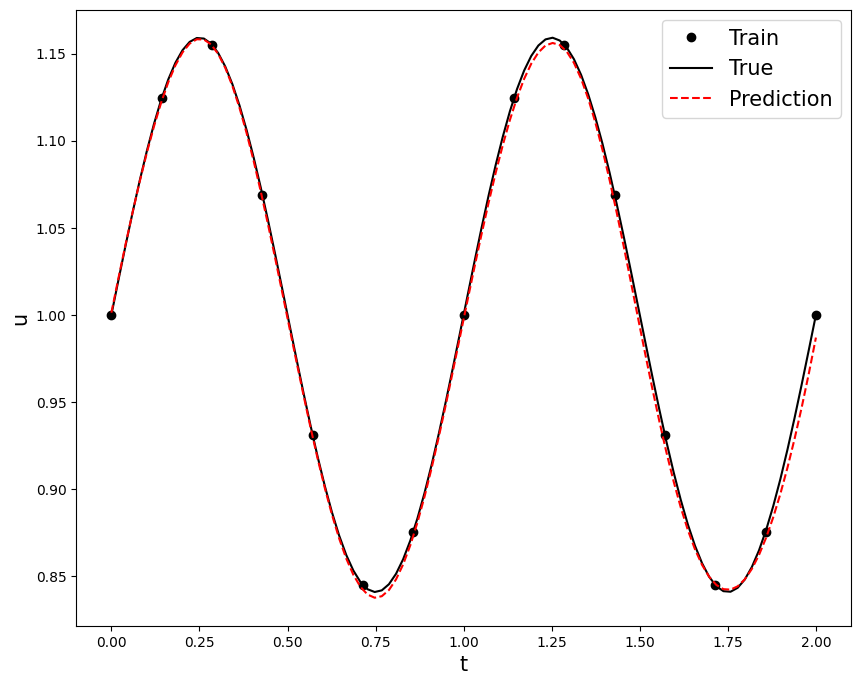

In [7]:
test_t = np.linspace(0, 2, 100)

train_u = np.sin(2*np.pi*train_t)/(2*np.pi) + 1
true_u = np.sin(2*np.pi*test_t)/(2*np.pi) + 1
pred_u = NN.predict(test_t).ravel()

plt.figure(figsize = (10,8))
plt.plot(train_t, train_u, 'ok', label = 'Train')
plt.plot(test_t, true_u, '-k',label = 'True')
plt.plot(test_t, pred_u, '--r', label = 'Prediction')
plt.legend(fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.show()



# Reworked PINN to have collocation point loss instead of initial condition loss

1.6031113
0.52007186
0.3872332
0.31575596
0.23091325
0.065507874
0.0029497705
0.0025917878
0.002109835
0.0018979334
4/4 [==============================] - 0s 1ms/step


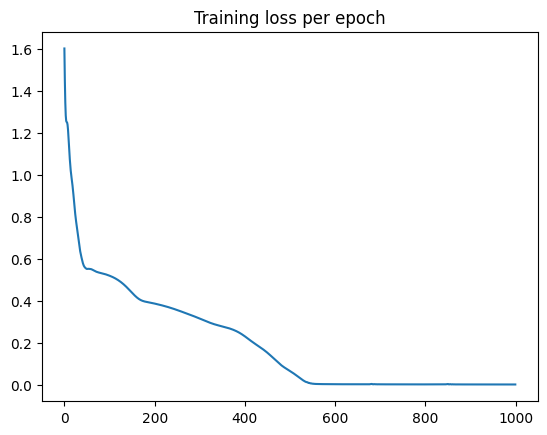

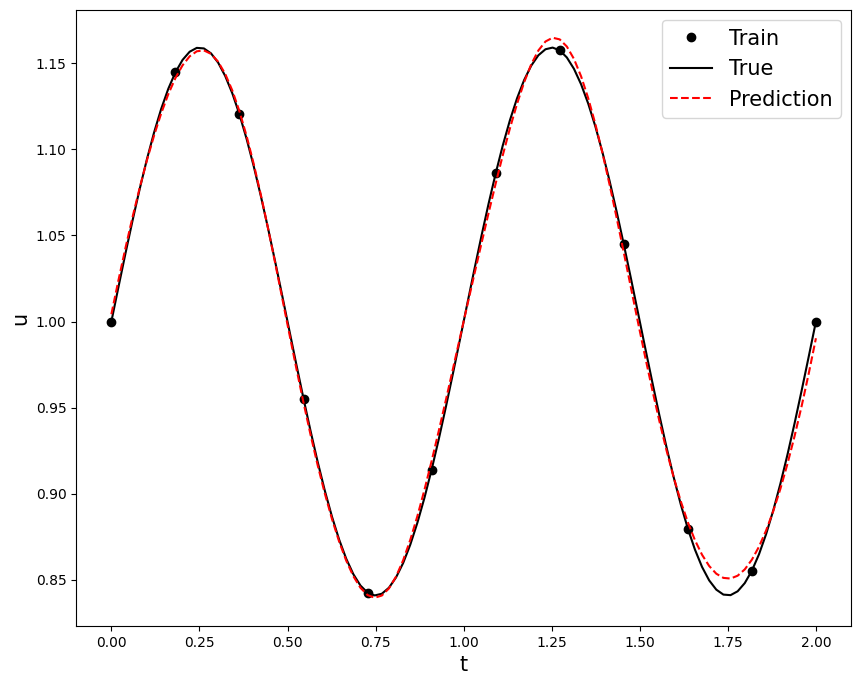

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

model = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

optm = tf.keras.optimizers.Adam(learning_rate = 0.001)


def ode_system(t, u, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    u = u.reshape(-1,1)
    u = tf.constant(u, dtype = tf.float32)

    
    with tf.GradientTape() as tape:
        tape.watch(t)
        predicted_u = net(t)
        u_t = tape.gradient(predicted_u, t)

    loss_ode = tf.reduce_mean(tf.square(u_t - tf.math.cos(2*np.pi*t)))
    loss_mse = tf.reduce_mean(tf.square(predicted_u - u))
    
#     print('ODE Loss:', loss_ode.numpy())
#     print('MSE Loss:', loss_mse.numpy())
    
    return 2*loss_mse + loss_ode


train_t = np.linspace(0,2,12)
train_u = np.sin(2*np.pi*train_t)/(2*np.pi) + 1

train_loss_record = []
for itr in range(1000):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, train_u, model)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, model.trainable_variables)
        optm.apply_gradients(zip(grad_w, model.trainable_variables))

    if itr % 100 == 0:
        print(train_loss.numpy())
        
plt.plot(train_loss_record)
plt.title('Training loss per epoch')


# Test data
test_t = np.linspace(0,2,100)
pred_u = model.predict(test_t).ravel()
true_u = np.sin(2*np.pi*test_t)/(2*np.pi) + 1


# Plotting
plt.figure(figsize = (10,8))
plt.plot(train_t, train_u, 'ok', label = 'Train')
plt.plot(test_t, true_u, '-k',label = 'True')
plt.plot(test_t, pred_u, '--r', label = 'Prediction')
plt.legend(fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.ylabel('u', fontsize = 15)
plt.show()

# 2 DOF Predict Coefficient

In [9]:
# plt.plot(data.iloc[:,-3].values)
plt.plot(t,pitch_response)
plt.grid()




# plt.plot(pitchd)
# pitch_rate = scipy.integrate.cumulative_trapezoid(data.iloc[:,-3].values)
# print(pitch_rate)
# plt.plot(pitch_rate)

NameError: name 't' is not defined

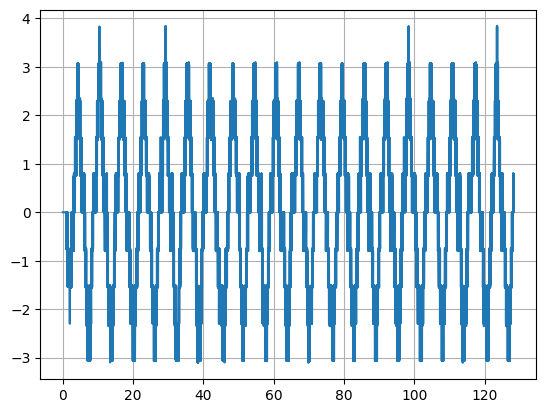

In [ ]:
tstep = t[2]-t[1]

pitchd = np.array([np.diff(pitch_response, n=1)])
pitchd = np.transpose(pitchd)/tstep
plt.plot(t[:-1], pitchd)
plt.grid()


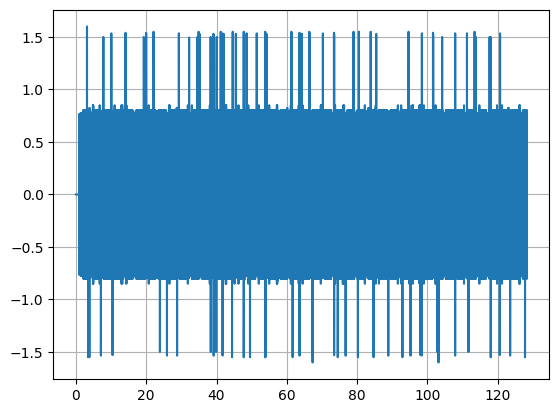

In [20]:
tstep = t[2]-t[1]

pitchd2 = np.array([np.diff(pitch_response, n=2)])
pitchd2 = np.transpose(pitchd2)/tstep
plt.plot(t[:-2], pitchd2)
plt.grid()


### Trying to filter first

In [80]:
from scipy.signal import butter, filtfilt

def lowpass(order, highStop, sampleRate, data):
    b, a = butter(order, highStop, 'lowpass', fs=sampleRate)
    return filtfilt(b, a, data)

0.15833333333333333


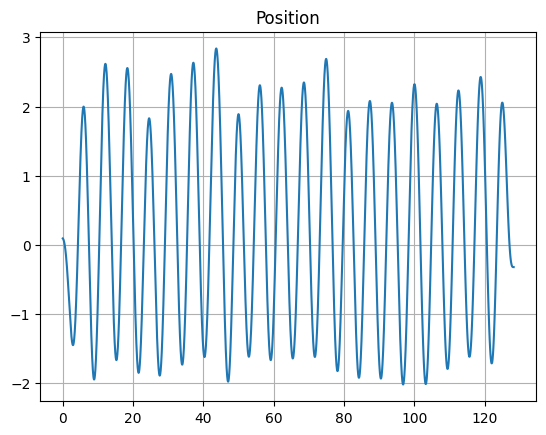

In [84]:
order = 3
wn = 19/120 # Rough estimation of the main frequency present in the position data based on plotting
print(wn)
highStop = 0.25
sampleRate = len(pitch_response)/t[-1]


filt_pitch_response = lowpass(order, highStop, sampleRate, pitch_response)

plt.plot(t, filt_pitch_response)
plt.title('Position')
plt.grid()

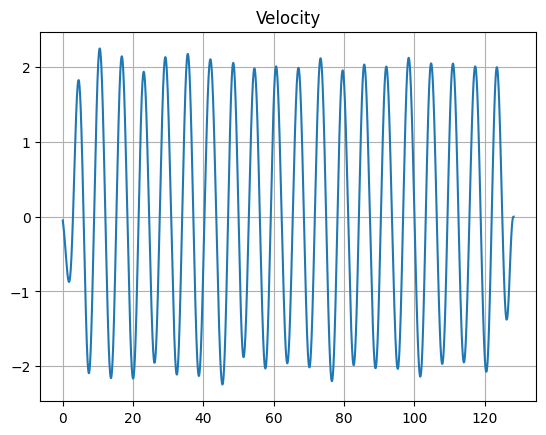

In [85]:
tstep = t[2]-t[1]

pitchd = np.array([np.diff(filt_pitch_response, n=1)])
pitchd = np.transpose(pitchd)/tstep
plt.plot(t[:-1], pitchd)
plt.title('Velocity')
plt.grid()

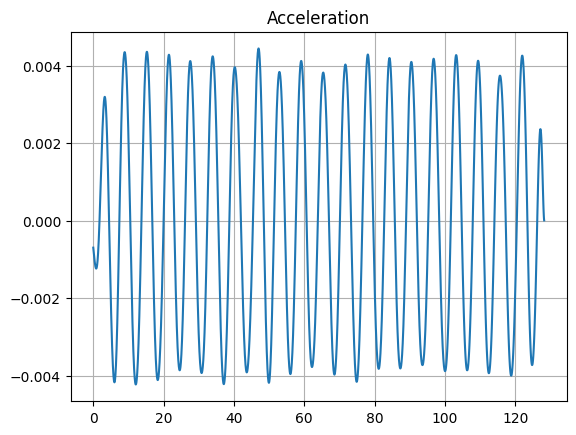

In [86]:
tstep = t[2]-t[1]

pitchd2 = np.array([np.diff(filt_pitch_response, n=2)])
pitchd2 = np.transpose(pitchd2)/tstep
plt.plot(t[:-2], pitchd2)
plt.title('Acceleration')
plt.grid()

# plt.plot(t,pitch_acceleration, '.', alpha=1)

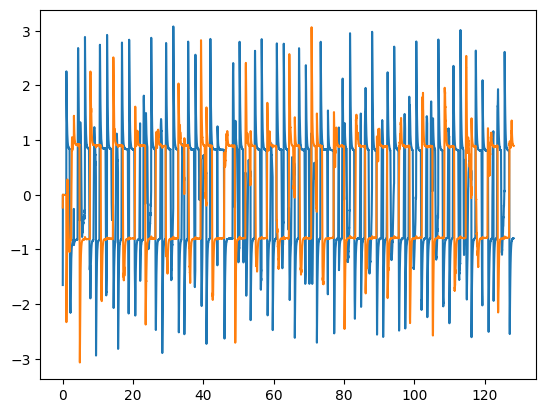

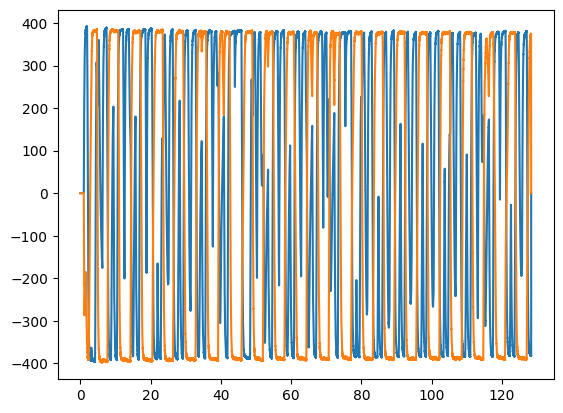

In [87]:
# Assuming low frequency is pitch then, motor_response1 = yaw and motor_response2 = pitch

motor_response1 = data.iloc[:,7].values
motor_response2 = data.iloc[:,8].values

plt.plot(t, motor_input1)
plt.plot(t, motor_input2)

plt.figure()

plt.plot(t, motor_response1)
plt.plot(t,motor_response2)

### 2DOF System

In [12]:
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from scipy.signal import butter, filtfilt
import os

from tensorflow.keras import backend as K
K.clear_session()

os.chdir('/home/coder/workspace/Data/2DOF_Machine/')
name1 = '2DOF_Balanced_Data2_23-10-06_with_CG.csv'
name2 = '2DOF_Balanced_Data1_23-10-06_with_CG.csv'
name3 = '2DOF_Balanced_Data_23-10-06_with_CG.csv'
name4 = '2DOF_1High_Vert_Data1_23-10-06_with_CG.csv'
name5 = '2DOF_1High_Vert_Data_23-10-06_with_CG.csv'
name6 = '2DOF_1High_Vert_Data_23-10-06_with_CG.csv'

names = [name1, name2, name3]
# names = [name1]

data = np.empty((0,12))
for name in names:
    datum = pd.read_csv(name)
    # print(datum.shape)
    data = np.concatenate((data, datum), axis=0)

data = pd.DataFrame(data)

In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)


Physical devices cannot be modified after being initialized


In [14]:
t = data.iloc[:,0].values
yaw_input = data.iloc[:,1].values
pitch_input = data.iloc[:,5].values
motor_input1 = data.iloc[:,3].values
motor_input2 = data.iloc[:,4].values
pitch_response = data.iloc[:,6].values
yaw_response = data.iloc[:,2].values
yaw_acceleration = data.iloc[:,-2].values
pitch_acceleration = data.iloc[:,-3].values
motor_response_yaw = data.iloc[:,7].values
motor_response_pitch = data.iloc[:,8].values


def lowpass(order, highStop, sampleRate, data):
    '''
    The function uses a Butterworth low pass filter and returns the filtered time-series data

    :param order: order of the filter (higher order means faster roll off), int
    :param highStop: high frequency before the roll off starts, int
    :param sampleRate: sample rate at which the data was collected, int
    :param data: collected data, array_like
    '''
    b, a = butter(order, highStop, 'lowpass', fs=sampleRate)
    return filtfilt(b, a, data)


# Filter position inputs to reduce measurment noise
order = 3
highStop = 1
# highStop = 100
sampleRate = len(data)/t[-1]

pitch_response = lowpass(order, highStop, sampleRate, yaw_input)
yaw_response = lowpass(order, highStop, sampleRate, pitch_input)

#compute derivatives for velocities
tstep = t[2]-t[1]
pitch_velocity = np.array([np.diff(pitch_response, n=1)])
pitch_velocity = np.transpose(pitch_velocity)/tstep
pitch_velocity= np.append(pitch_velocity, 0)
yaw_velocity = np.array([np.diff(yaw_response, n=1)])
yaw_velocity = np.transpose(yaw_velocity)/tstep
yaw_velocity = np.append(yaw_velocity, 0)

# Compute derivatives for accelerations
# We thought we knew which inputs were accelerations but we don't 
# so I'm going to try to use the ones computed from derivatives
d2pitchdt2 = np.array([np.diff(pitch_velocity, n=1)])
d2pitchdt2 = np.transpose(d2pitchdt2)/tstep
d2pitchdt2= np.append(d2pitchdt2, 0)
d2yawdt2 = np.array([np.diff(yaw_velocity, n=1)])
d2yawdt2 = np.transpose(d2yawdt2)/tstep
d2yawdt2 = np.append(d2yawdt2, 0)

# plotting as a data check
# plt.plot(d2pitchdt2)
# print(len(d2yawdt2))
# print(len(data))
# plt.plot(pitch_velocity)
# plt.plot(yaw_velocity)




In [61]:
def diff_data_check():
    '''
    Check if each input is the correct lenght
    '''
    if len(data) != len(d2pitchdt2):
        raise Exception('d2pitchdt2 is not the right length')
    elif len(data) != len(d2yawdt2):
        raise Exception('d2yawdt2 is not the right length')
    elif len(data) != len(t):
        raise Exception('t is not the right length')

    # print(np.shape(yaw_input))
    # print(np.shape(pitch_input))
    # print(np.shape(motor_input1))
    # print(np.shape(motor_input2))
    # print(np.shape(yaw_response))
    # print(np.shape(pitch_response))
    # print(np.shape(t))
    # print(np.shape(pitch_acceleration))
    # print(np.shape(d2pitchdt2))
    # print(np.shape(d2yawdt2))

diff_data_check()

In [62]:
inputs = np.array([yaw_input, pitch_input, motor_input1, motor_input2, yaw_response, pitch_response, t,
                 yaw_velocity, pitch_velocity, yaw_acceleration, pitch_acceleration, motor_response_yaw, 
                 motor_response_pitch, d2yawdt2])
                 
# inputs = np.array([pitch_response])
inputs = np.transpose(inputs)

outputs = np.array([d2pitchdt2])
outputs = np.transpose(outputs)

input_train, input_test, output_train, output_test = train_test_split(inputs, outputs, shuffle=False, test_size=0.25)


model = Sequential([
    Dense(units=500, activation='tanh'),
    Dense(units=200, activation='tanh'),
    Dense(units=100, activation='tanh'),
    Dense(units=5, activation='linear') # Outputs pitch acceleration and a 4 predicted coefficients
])


optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [67]:
def custom_loss(input_train, output_train, net):
    # Convert inputs and outputs to tensors
    input_train = tf.convert_to_tensor(input_train, dtype=tf.float32)
    output_train = tf.convert_to_tensor(output_train, dtype=tf.float32)

    predictions = net(input_train)
    
    # unpack t and reshape
    t = input_train[:,-1]
    t = tf.expand_dims(t, axis=1)
    
    # unpack pred_coeff and reshape
    pred_coeff1 = net(input_train)[:,1]
    pred_coeff2 = net(input_train)[:,2]
    pred_coeff3 = net(input_train)[:,3]
    pred_coeff4 = net(input_train)[:,4]

    grad1 = tf.experimental.numpy.diff(net(input_train)[:,1])
    dgrad1 = tf.experimental.numpy.diff(grad1)
    grad2 = tf.experimental.numpy.diff(net(input_train)[:,2])
    dgrad2 = tf.experimental.numpy.diff(grad2)
    grad3 = tf.experimental.numpy.diff(net(input_train)[:,3])
    dgrad3 = tf.experimental.numpy.diff(grad3)
    grad4 = tf.experimental.numpy.diff(net(input_train)[:,4])
    dgrad4 = tf.experimental.numpy.diff(grad4)

    # reshape
    pred_coeff1 = tf.expand_dims(pred_coeff1, axis=1)
    pred_coeff2 = tf.expand_dims(pred_coeff2, axis=1)
    pred_coeff3 = tf.expand_dims(pred_coeff3, axis=1)
    pred_coeff4 = tf.expand_dims(pred_coeff4, axis=1)
    grad1 = tf.expand_dims(grad1, axis=1)
    dgrad1 = tf.expand_dims(dgrad1, axis=1)
    grad2 = tf.expand_dims(grad2, axis=1)
    dgrad2 = tf.expand_dims(dgrad2, axis=1)
    grad3 = tf.expand_dims(grad3, axis=1)
    dgrad3 = tf.expand_dims(dgrad3, axis=1)
    grad4 = tf.expand_dims(grad4, axis=1)
    dgrad4 = tf.expand_dims(dgrad4, axis=1)
    


    # unpack theta and reshape
    pred_pitch_accel = predictions[:,0]
    pred_pitch_accel = tf.expand_dims(pred_pitch_accel, axis=1)
    
    # Compute L_c: Collocation point loss
    L_c = tf.reduce_mean(tf.square(output_train - pred_pitch_accel))
    
    # Compute L_eq: Equation loss
#   L_eq = tf.reduce_mean(tf.square(pred_coeff*pred_theta+A33*dtheta_dt+B31*))
    
    # coeff1 = tf.constant([[0.1]])
    # L_eq = tf.reduce_mean(tf.square(pred_coeff - 0.1)) #+ tf.reduce_mean(tf.square(pred_coeff_grad - 0))
    theta = input_train[:,5]
    theta = tf.expand_dims(theta, axis=1)
    dtheta = input_train[:,8]
    dtheta = tf.expand_dims(dtheta, axis=1)
    Vp = input_train[:,12]
    Vp = tf.expand_dims(Vp, axis=1)
    Vy = input_train[:,11]
    Vy = tf.expand_dims(Vy, axis=1)

    # L_eq = tf.reduce_mean(tf.square(pred_coeff*theta-0.086*dtheta+0.023*Vp/1000+0.0099*Vy/1000-output_train)) # Assuming voltages are mV
    # L_eq = tf.reduce_mean(tf.square(-0.321*theta+pred_coeff*dtheta+0.023*Vp/1000+0.0099*Vy/1000-output_train)) 
    # L_eq = tf.reduce_mean(tf.square(-0.321*theta-0.086*dtheta+pred_coeff*Vp/1000+0.0099*Vy/1000-output_train)) 
    # L_eq = tf.reduce_mean(tf.square(-0.321*theta-0.086*dtheta+0.023*Vp/1000+pred_coeff*Vy/1000-output_train)) 

    L_eq = tf.reduce_mean(tf.square(pred_coeff1*theta+pred_coeff2*dtheta+pred_coeff3*Vp+pred_coeff4*Vy-output_train)) # Voltage is in Volts




    # gradient loss
    L_gr1 = tf.reduce_mean(tf.square(grad1 - 0)) + tf.reduce_mean(tf.square(dgrad1 - 0))
    L_gr2 = tf.reduce_mean(tf.square(grad2 - 0)) + tf.reduce_mean(tf.square(dgrad2 - 0))
    L_gr3 = tf.reduce_mean(tf.square(grad3 - 0)) + tf.reduce_mean(tf.square(dgrad3 - 0))
    L_gr4 = tf.reduce_mean(tf.square(grad4 - 0)) + tf.reduce_mean(tf.square(dgrad4 - 0))

    L_gr = L_gr1 + L_gr2 + L_gr3 + L_gr4

    # Adjusting loss component weights
    # L_eq = L_eq/10e9
    L_eq = L_eq/1000
    L_gr = L_gr*10
    L_c = L_c*10

    # print('Leq', L_eq)
    # print('Lc', L_c)
    # print('Lgr', L_gr)

    L_total = L_eq + L_c + L_gr

    return L_total

In [68]:
def nrmse(actual_values, predicted_values):
    """
    Calculate Normalized Root Mean Squared Error (NRMSE) for regression. Normalized over the range of the target variable
    In this case it's the range of the pitch acceleration data

    Parameters:
    - actual_values: NumPy array or list of actual values.
    - predicted_values: NumPy array or list of predicted values.

    Returns:
    - nrmse: Normalized Root Mean Squared Error.
    """
    actual_values = np.array(actual_values).flatten()
    predicted_values = np.array(predicted_values).flatten()

    if len(actual_values) != len(predicted_values):
        raise ValueError("Length of actual_values and predicted_values must be the same.")

    # Calculate RMSE
    rmse = np.sqrt(np.mean((actual_values - predicted_values) ** 2))

    # Calculate the range of the target variable
    target_range = np.max(actual_values) - np.min(actual_values)

    # Calculate NRMSE
    nrmse = (rmse / target_range) * 100 # Expressed as a percentage

    return nrmse


0 :  198.82545
100 :  0.18204929
200 :  0.1646506
300 :  0.15635528
400 :  0.14962049
500 :  0.14111635
600 :  0.12623438
700 :  0.09396369
800 :  0.059390016
900 :  0.04183025
1000 :  0.032727763
1100 :  0.024780212
1200 :  0.020093419
1300 :  0.016748738
1400 :  0.014340943
1500 :  0.013753619
1600 :  0.011150643
1700 :  0.01011227
1800 :  0.0092647765
1900 :  0.008616409
1721/1721 [==============================] - 2s 903us/step
-0.1511184
0.03575401
-0.027892696
0.04421574


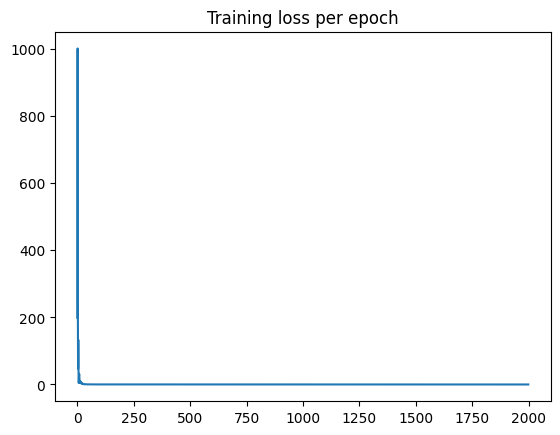

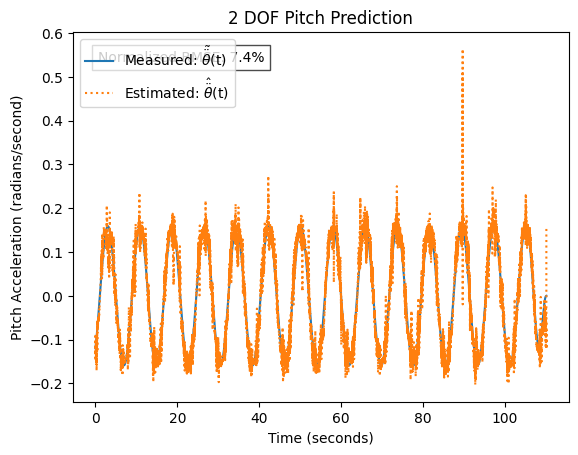

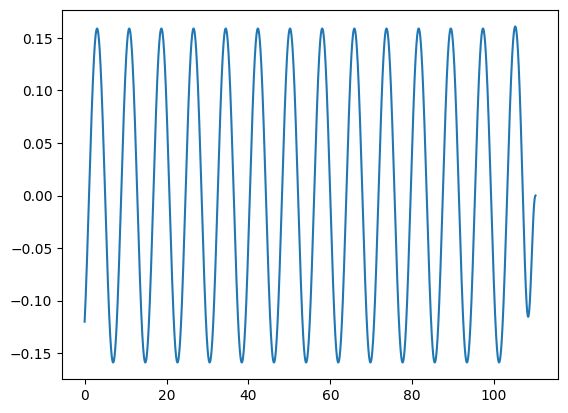

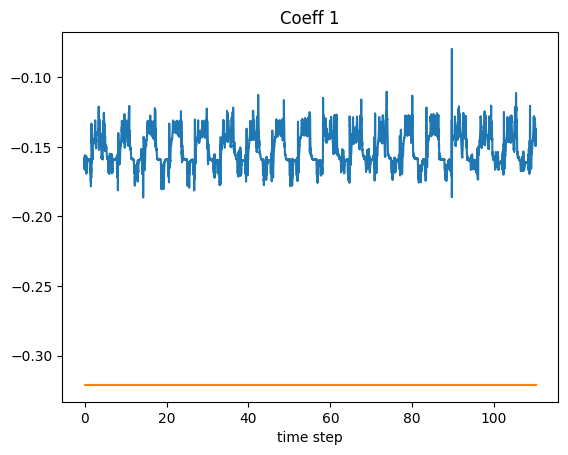

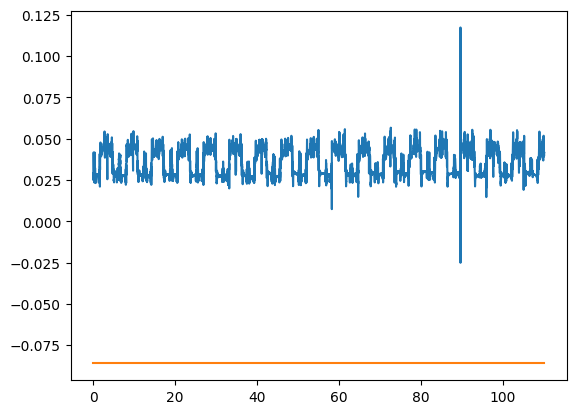

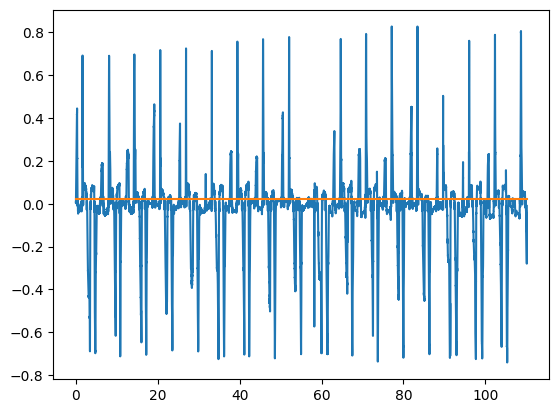

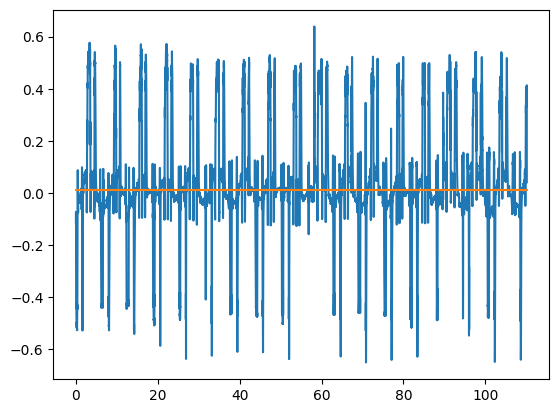

In [69]:
train_loss_record = []
for itr in range(2000):
#     print(itr)
    with tf.GradientTape() as tape:
        train_loss = custom_loss(input_train, output_train, model)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, model.trainable_variables)
        optm.apply_gradients(zip(grad_w, model.trainable_variables))

    if itr % 100 == 0:
        print(itr, ': ', train_loss.numpy())
        
plt.plot(train_loss_record)
plt.title('Training loss per epoch')


pitch_predictions_fnn = model.predict(input_test)

# Plotting 
plt.figure()
t = np.linspace(0,len(output_test)/500,len(output_test))
plt.plot(t,output_test)
plt.plot(t,pitch_predictions_fnn[:,0], linestyle=':')
plt.legend([r'Measured: $\tilde{\ddot{\theta}}$(t)', r'Estimated: $\hat{\ddot{\theta}}$(t)'])
plt.ylabel('Pitch Acceleration (radians/second)')
plt.xlabel('Time (seconds)')
plt.title('2 DOF Pitch Prediction')

nrmse_value = nrmse(output_test,pitch_predictions_fnn[:,0])
rounded_nrmse = round(nrmse_value, 3)
nrmse_text = f'Normalized RMSE: {rounded_nrmse}%'
# Add a textbox with the NRMSE value
plt.annotate(nrmse_text, xy=(0.05, 0.92), xycoords='axes fraction', bbox=dict(facecolor='white', alpha=0.7))

plt.figure()
plt.plot(t,output_test)

# print(output_test.shape)
# plt.savefig('collocation_prediction_performance.png', dpi=1000)

plt.figure()
predict_coeff1 = pitch_predictions_fnn[:,1]
plt.plot(t,predict_coeff1)
plt.plot([0,t[-1]], [-0.321,-0.321])
plt.xlabel('time step')
plt.title('Coeff 1')
print(np.mean(predict_coeff1))

plt.figure()
predict_coeff2 = pitch_predictions_fnn[:,2]
plt.plot(t,predict_coeff2)
plt.plot([0,t[-1]], [-0.086, -0.086])
print(np.mean(predict_coeff2))

plt.figure()
predict_coeff3 = pitch_predictions_fnn[:,3]
plt.plot(t,predict_coeff3)
plt.plot([0,t[-1]], [0.023, 0.023])
print(np.mean(predict_coeff3))

plt.figure()
predict_coeff4 = pitch_predictions_fnn[:,4]
plt.plot(t,predict_coeff4)
plt.plot([0,t[-1]], [0.0099, 0.0099])
print(np.mean(predict_coeff4))



# Test (Ignore)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

end_t = 10
num_samples = 100000
batch_size = 200

def generate_pendulum_data(num_samples):
    # Generate random values for theta and (g/l)
    t = np.linspace(0, end_t, num_samples)
    gl_ratio = 5
    wn = gl_ratio**0.5
    theta_true = 2*np.sin(wn * t)
    
    return t, theta_true

# Generate synthetic pendulum data with true (g/l) values for training
t_train, theta_train = generate_pendulum_data(num_samples)
omega = np.gradient(theta_train)
alpha = np.gradient(omega)


# Custom equation loss function
def equation_loss(y_true, y_pred):
    true_theta = y_true[:, 0]
    pred_theta = y_pred[:, 0]
    pred_gl_ratio = y_pred[:, 1]

    # Calculate the L_c, loss at collocation points
    L_c = tf.reduce_mean(tf.square(true_theta - pred_theta))
    
    # Calculate equation loss L_eq
    L_eq = tf.reduce_mean(tf.square(alpha - pred_gl_ratio*tf.sin(pred_theta)))
    
    
    return L_c + L_eq


# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu'))  # Input layer for theta
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(2))  # Output layer with 2 units (theta and (g/l))

# Compile the model with the custom equation loss
model.compile(optimizer='adam', loss=equation_loss)

# # Create input and target arrays
x_train = t_train.reshape(-1, 1)
y_train = theta_train.reshape(-1, 1)

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_1908329/3377043637.py", line 36, in equation_loss  *
        L_eq = tf.reduce_mean(tf.square(alpha - pred_gl_ratio*tf.sin(pred_theta)))

    ValueError: Dimensions must be equal, but are 100000 and 200 for '{{node equation_loss/sub_1}} = Sub[T=DT_FLOAT](equation_loss/sub_1/x, equation_loss/mul)' with input shapes: [100000], [200].


In [ ]:
x_test = np.linspace(0,end_t,1000)
predictions = model.predict(x_test)
# plt.plot(x_test,predictions[:,1])
plt.plot(x_train,y_train)
plt.plot(x_test,predictions[:,0], linestyle='--')

plt.figure()
plt.plot(x_test,predictions[:,1])
print(np.mean(predictions[:,1]))


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

end_t = 10
num_samples = 100000

def generate_pendulum_data(num_samples):
    # Generate random values for theta and (g/l)
    t = np.linspace(0, end_t, num_samples)
    gl_ratio = 2
    wn = gl_ratio**0.5
    theta_true = 2 * np.sin(wn * t)
    
    return t, theta_true

# Generate synthetic pendulum data with true (g/l) values for training
t_train, theta_train = generate_pendulum_data(num_samples)
omega = np.gradient(theta_train)
alpha = np.gradient(omega)

# Convert numpy arrays to PyTorch tensors
t_train = torch.Tensor(t_train).view(-1, 1)
theta_train = torch.Tensor(theta_train).view(-1, 1)
alpha = torch.Tensor(alpha)

# Custom equation loss function
def equation_loss(y_true, y_pred):
    true_theta = y_true[:, 0]
    pred_theta = y_pred[:, 0]
    pred_gl_ratio = y_pred[:, 1]

    # Calculate the L_c, loss at collocation points
    L_c = torch.mean((true_theta - pred_theta) ** 2)
    
#     Calculate equation loss L_eq
    L_eq = torch.mean((alpha - pred_gl_ratio * torch.sin(pred_theta)) ** 2)
    L_eq = L_eq*100
    print(L_c.detach().numpy())
    print(L_eq.detach().numpy())

#     print(L_eq.numpy())
    
    return L_c + L_eq

# Build the neural network model
class PendulumModel(nn.Module):
    def __init__(self):
        super(PendulumModel, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 2)  # Output layer with 2 units (theta and (g/l))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = self.fc5(x)
        return x

model = PendulumModel()

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(t_train)  # Use t_train instead of x_train
    loss = equation_loss(theta_train, predictions)  # Use theta_train instead of y_train
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")


In [ ]:
x_test = np.linspace(0,end_t,1000)
x_test = torch.Tensor(x_test).view(-1,1)
model.eval()  # Set the model in evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    predictions = model(x_test)
    
predicted_theta = predictions[:, 0].numpy()
predicted_gl_ratio = predictions[:, 1].numpy()


plt.plot(t_train,theta_train)
plt.plot(x_test,predicted_theta, linestyle='--')

plt.figure()
plt.plot(x_test,predicted_gl_ratio)
print(np.mean(predicted_gl_ratio))